In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
import math

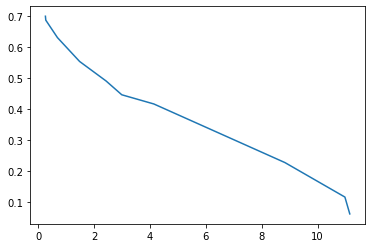

In [2]:
i_cell_val=[0.254568724,0.267515924,0.685159831,1.477697085,2.42624561,2.987886184,4.136129135,8.828948152,10.97566323,11.15039586]
U_exp=[0.700796779,0.688151659,0.631765366,0.554685447,0.491535634,0.446959295,0.417241736,0.227792296,0.116351449,0.061869257]
plt.plot(i_cell_val,U_exp)

In [3]:
F=96485.4 ; R=8.3144 ; T=303
k_m=17 ; d_m=1.778e-4
k_aq=5 ; d_cell=2.2e-2
Ca=4e2 ; Cc=5e2
Va=5.5e-5 ; Vc=5.5e-5
Am=5e-4 ; Yac=0.05 ; K_dec=8.33e-4
fx=10
Qa=2.25e-5 ; Qc=1.11e-3
C_Ac_in=1.56 ; C_CO2_in=0 ; X_in=0 ; C_H_in=0 ; C_O2_in=0.3125 ; C_M_in=0 ; C_OH_in=0
Uo=0.77


ko_1=0.207 ; ko_2=3.288e-05 ; K_Ac=0.592 ; K_O2=0.004 ; al=0.051 ; be=0.663

In [4]:
def model(ini,t,i_cell,F,R,T,k_m,d_m,k_aq,d_cell,Ca,Cc,Va,Vc,Am,Yac,K_dec,fx,Qa,Qc,C_Ac_in,C_CO2_in,X_in,C_H_in,C_O2_in,C_M_in,C_OH_in,Uo,ko_1,ko_2,K_Ac,K_O2,al,be):
    
    C_Ac=ini[0] ; C_CO2=ini[1] ; C_H=ini[2] ; X=ini[3] ; C_O2=ini[4] ; C_OH=ini[5] ; C_M=ini[6] ; n_a=ini[7] ; n_c=ini[8]

    N_M=3600*i_cell/F
    
    r_1=ko_1 * C_Ac*X/(K_Ac+C_Ac) * ((math.exp(al*F/R/T))**n_a)
    r_2=-ko_2 * C_O2/(K_O2+C_O2) * ((math.exp((be-1)*F/R/T))**n_c)
    
    dC_Acdt=1/Va*((Qa*(C_Ac_in-C_Ac)) - Am*r_1)
    dC_CO2dt=1/Va*((Qa*(C_CO2_in-C_CO2)) + 2*Am*r_1)
    dC_Hdt=1/Va*((Qa*(C_H_in-C_H)) + 8*Am*r_1)
    dXdt=1/Va*((Qa*(X_in-X)/fx) + Am*Yac*r_1 - Va*K_dec*X)
    
    dC_O2dt=1/Vc*((Qc*(C_O2_in-C_O2)) + r_2*Am)
    dC_OHdt=1/Vc*((Qc*(C_OH_in-C_OH)) - 4*r_2*Am)
    
    dC_Mdt=1/Vc*((Qc*(C_M_in-C_M)) + N_M*Am)
    
    dn_adt=1/Ca*(3600*i_cell - 8*F*r_1)
    dn_cdt=1/Cc*(-3600*i_cell - 4*F*r_2)
    
    return [dC_Acdt,dC_CO2dt,dC_Hdt,dXdt,dC_O2dt,dC_OHdt,dC_Mdt,
           dn_adt,dn_cdt]


In [5]:
def calculation():
    C_Ac=mod[:,0]
    C_CO2=mod[:,1]
    C_H=mod[:,2]
    X=mod[:,3]
    C_O2=mod[:,4]
    C_OH=mod[:,5]
    C_M=mod[:,6]
    n_a=mod[:,7]
    n_c=mod[:,8]
    r_1=ko_1 * C_Ac[-1]*X[-1]/(K_Ac+C_Ac[-1]) * ((math.exp(al*F/R/T))**n_a[-1])
    r_2=-ko_2 * C_O2[-1]/(K_O2+C_O2[-1]) * ((math.exp((be-1)*F/R/T))**n_c[-1])
    Ac.append(C_Ac[-1])
    CO2.append(C_CO2[-1])
    H.append(C_H[-1])
    x.append(X[-1])
    O2.append(C_O2[-1])
    OH.append(C_OH[-1])
    M.append(C_M[-1])
    na.append(n_a[-1])
    nc.append(n_c[-1])
    r1.append(r_1)
    r2.append(r_2)
    U.append(Uo-n_a[-1]+n_c[-1]-(((d_m/k_m)+d_cell/k_aq)*i_cell_1))

def concplot():
    plt.plot(i_cell_val,Ac,label='Ac')
    plt.plot(i_cell_val,CO2,label='CO2')
    #plt.plot(i_cell_val,H,label='H')
    plt.plot(i_cell_val,x,label='X')
    plt.plot(i_cell_val,O2,label='O2')
    plt.plot(i_cell_val,OH,label='OH')
    plt.plot(i_cell_val,M,label='M')
    plt.legend()
    
def rateplot():
    plt.plot(i_cell_val,r1,label='r_1')
    plt.plot(i_cell_val,r2,label='r_2')
    plt.legend()
    
def nancplot():
    plt.plot(i_cell_val,na,label='na')
    plt.plot(i_cell_val,nc,label='nc')
    plt.legend()
    
def Uplot(Uexp):
    plt.plot(i_cell_val,U,label='U_calc')
    plt.scatter(i_cell_val,Uexp,label='U_expt')
    plt.legend()
    
def Pdplot():
    plt.plot(i_cell_val,Pd,label='Power density')
    #plt.plot(i_cell_val,Pd1,label='Power density given')
    plt.legend()

# Steady State Simulation

In [6]:
Ac=[] ; CO2=[] ; H=[] ; x=[] ; O2=[] ; OH=[] ; M=[] ; na=[] ; nc=[] ; U=[]
r1=[] ; r2=[]
for i in range(0,len(i_cell_val)):
    t=np.linspace(0,150,1000)
    i_cell_1=i_cell_val[i]
    ini=(1.56,0,0,0.1,0.3125,0,0,0,0)
    mod=odeint(model,ini,t,args=(i_cell_1,
                                 F,R,T,k_m,d_m,k_aq,d_cell,Ca,Cc,Va,Vc,Am,Yac,K_dec,fx,Qa,Qc,C_Ac_in,C_CO2_in,X_in,C_H_in,C_O2_in,C_M_in,C_OH_in,Uo,ko_1,ko_2,K_Ac,K_O2,al,be))
    calculation()
    
Pd=[i*j for i,j in zip(i_cell_val,U)]   
Pd1=Pd
U1=U

Text(0, 0.5, 'Concentrations (mol/m^3)')

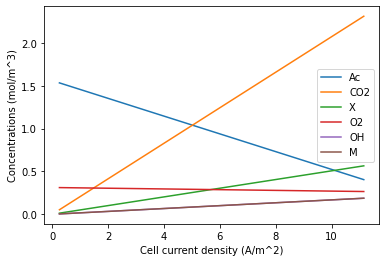

In [7]:
concplot()
plt.xlabel('Cell current density (A/m^2)')
plt.ylabel('Concentrations (mol/m^3)')

Text(0, 0.5, 'Overpotential (Volt)')

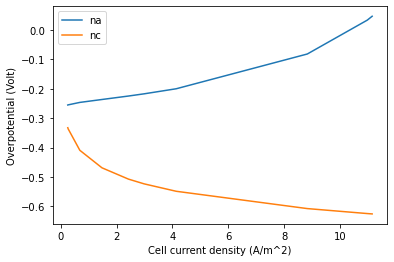

In [8]:
nancplot()
plt.xlabel('Cell current density (A/m^2)')
plt.ylabel('Overpotential (Volt)')

Text(0, 0.5, 'Reaction rates (mol/m^2.hr)')

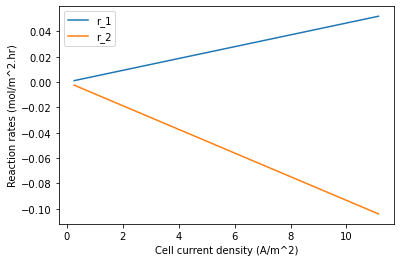

In [9]:
rateplot()
plt.xlabel('Cell current density (A/m^2)')
plt.ylabel('Reaction rates (mol/m^2.hr)')

Text(0, 0.5, 'Cell voltage (Volt)')

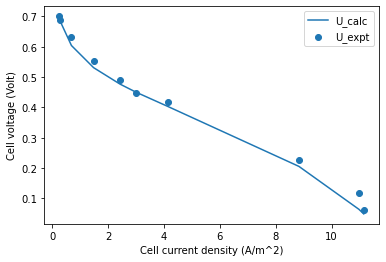

In [10]:
Uplot(U_exp)
plt.xlabel('Cell current density (A/m^2)')
plt.ylabel('Cell voltage (Volt)')

Text(0, 0.5, 'Power density (W/m^2)')

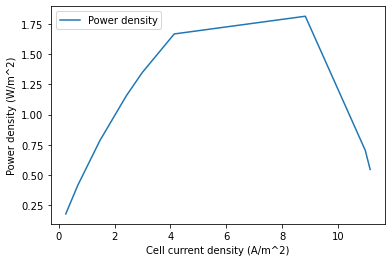

In [11]:
Pdplot()
plt.xlabel('Cell current density (A/m^2)')
plt.ylabel('Power density (W/m^2)')

# Sensitivity analysis

Text(0, 0.5, 'Cell voltage (Volt)')

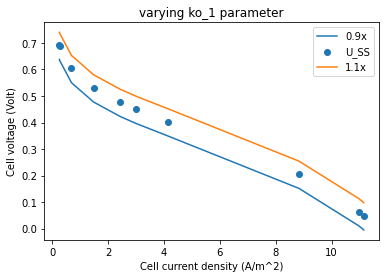

In [12]:
# ko_1 parameter

Ac=[] ; CO2=[] ; H=[] ; x=[] ; O2=[] ; OH=[] ; M=[] ; na=[] ; nc=[] ; U=[]
r1=[] ; r2=[]
for i in range(0,len(i_cell_val)):
    t=np.linspace(0,150,1000)
    i_cell_1=i_cell_val[i]
    ini=(1.56,0,0,0.1,0.3125,0,0,0,0)
    mod=odeint(model,ini,t,args=(i_cell_1,
                                 F,R,T,k_m,d_m,k_aq,d_cell,Ca,Cc,Va,Vc,Am,Yac,K_dec,fx,Qa,Qc,C_Ac_in,C_CO2_in,X_in,C_H_in,C_O2_in,C_M_in,C_OH_in,Uo,0.9*ko_1,ko_2,K_Ac,K_O2,al,be))
    calculation()
Pd_1=[i*j for i,j in zip(i_cell_val,U)]   
#Pdplot()
#Uplot(U1)
plt.plot(i_cell_val,U,label='0.9x')
plt.scatter(i_cell_val,U1,label='U_SS')
plt.legend()


Ac=[] ; CO2=[] ; H=[] ; x=[] ; O2=[] ; OH=[] ; M=[] ; na=[] ; nc=[] ; U=[]
r1=[] ; r2=[]
for i in range(0,len(i_cell_val)):
    t=np.linspace(0,150,1000)
    i_cell_1=i_cell_val[i]
    ini=(1.56,0,0,0.1,0.3125,0,0,0,0)
    mod=odeint(model,ini,t,args=(i_cell_1,
                                 F,R,T,k_m,d_m,k_aq,d_cell,Ca,Cc,Va,Vc,Am,Yac,K_dec,fx,Qa,Qc,C_Ac_in,C_CO2_in,X_in,C_H_in,C_O2_in,C_M_in,C_OH_in,Uo,1.1*ko_1,ko_2,K_Ac,K_O2,al,be))
    calculation()
Pd_2=[i*j for i,j in zip(i_cell_val,U)]   
#Pdplot()
#Uplot(U1)
plt.plot(i_cell_val,U,label='1.1x')
plt.legend()
plt.title('varying ko_1 parameter')
plt.xlabel('Cell current density (A/m^2)')
plt.ylabel('Cell voltage (Volt)')

#plt.plot(i_cell_val,Pd1,label='Base')
#plt.plot(i_cell_val,Pd_1,label='0.9ko_1')
#plt.plot(i_cell_val,Pd_2,label='1.1ko_1')
#plt.legend()

Text(0, 0.5, 'Cell voltage (Volt)')

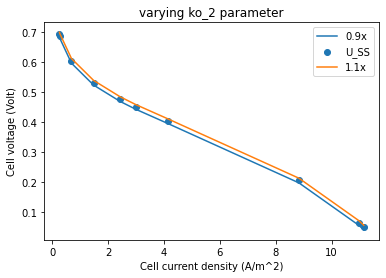

In [13]:
# ko_2 parameter

Ac=[] ; CO2=[] ; H=[] ; x=[] ; O2=[] ; OH=[] ; M=[] ; na=[] ; nc=[] ; U=[]
r1=[] ; r2=[]
for i in range(0,len(i_cell_val)):
    t=np.linspace(0,150,1000)
    i_cell_1=i_cell_val[i]
    ini=(1.56,0,0,0.1,0.3125,0,0,0,0)
    mod=odeint(model,ini,t,args=(i_cell_1,
                                 F,R,T,k_m,d_m,k_aq,d_cell,Ca,Cc,Va,Vc,Am,Yac,K_dec,fx,Qa,Qc,C_Ac_in,C_CO2_in,X_in,C_H_in,C_O2_in,C_M_in,C_OH_in,Uo,ko_1,0.9*ko_2,K_Ac,K_O2,al,be))
    calculation()

#Uplot(U1)
Pd_1=[i*j for i,j in zip(i_cell_val,U)]   
#Pdplot()
plt.plot(i_cell_val,U,label='0.9x')
plt.scatter(i_cell_val,U1,label='U_SS')
plt.legend()


Ac=[] ; CO2=[] ; H=[] ; x=[] ; O2=[] ; OH=[] ; M=[] ; na=[] ; nc=[] ; U=[]
r1=[] ; r2=[]
for i in range(0,len(i_cell_val)):
    t=np.linspace(0,150,1000)
    i_cell_1=i_cell_val[i]
    ini=(1.56,0,0,0.1,0.3125,0,0,0,0)
    mod=odeint(model,ini,t,args=(i_cell_1,
                                 F,R,T,k_m,d_m,k_aq,d_cell,Ca,Cc,Va,Vc,Am,Yac,K_dec,fx,Qa,Qc,C_Ac_in,C_CO2_in,X_in,C_H_in,C_O2_in,C_M_in,C_OH_in,Uo,ko_1,1.1*ko_2,K_Ac,K_O2,al,be))
    calculation()

#Uplot(U1)
Pd_2=[i*j for i,j in zip(i_cell_val,U)]   
#Pdplot()
plt.title('varying ko_2 parameter')
plt.plot(i_cell_val,U,label='1.1x')
plt.legend()
plt.xlabel('Cell current density (A/m^2)')
plt.ylabel('Cell voltage (Volt)')

#plt.plot(i_cell_val,Pd1,label='Base')
#plt.plot(i_cell_val,Pd_1,label='0.9ko_2')
#plt.plot(i_cell_val,Pd_2,label='1.1ko_2')
#plt.legend()

Text(0, 0.5, 'Cell voltage (Volt)')

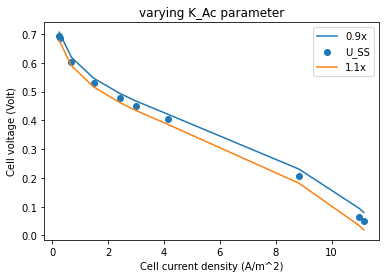

In [14]:
# K_Ac parameter

Ac=[] ; CO2=[] ; H=[] ; x=[] ; O2=[] ; OH=[] ; M=[] ; na=[] ; nc=[] ; U=[]
r1=[] ; r2=[]
for i in range(0,len(i_cell_val)):
    t=np.linspace(0,150,1000)
    i_cell_1=i_cell_val[i]
    ini=(1.56,0,0,0.1,0.3125,0,0,0,0)
    mod=odeint(model,ini,t,args=(i_cell_1,
                                 F,R,T,k_m,d_m,k_aq,d_cell,Ca,Cc,Va,Vc,Am,Yac,K_dec,fx,Qa,Qc,C_Ac_in,C_CO2_in,X_in,C_H_in,C_O2_in,C_M_in,C_OH_in,Uo,ko_1,ko_2,0.9*K_Ac,K_O2,al,be))
    calculation()

#Uplot(U1)
Pd_1=[i*j for i,j in zip(i_cell_val,U)]   
plt.plot(i_cell_val,U,label='0.9x')
plt.scatter(i_cell_val,U1,label='U_SS')
plt.legend()


Ac=[] ; CO2=[] ; H=[] ; x=[] ; O2=[] ; OH=[] ; M=[] ; na=[] ; nc=[] ; U=[]
r1=[] ; r2=[]
for i in range(0,len(i_cell_val)):
    t=np.linspace(0,150,1000)
    i_cell_1=i_cell_val[i]
    ini=(1.56,0,0,0.1,0.3125,0,0,0,0)
    mod=odeint(model,ini,t,args=(i_cell_1,
                                 F,R,T,k_m,d_m,k_aq,d_cell,Ca,Cc,Va,Vc,Am,Yac,K_dec,fx,Qa,Qc,C_Ac_in,C_CO2_in,X_in,C_H_in,C_O2_in,C_M_in,C_OH_in,Uo,ko_1,ko_2,1.1*K_Ac,K_O2,al,be))
    calculation()

#Uplot(U1)
Pd_2=[i*j for i,j in zip(i_cell_val,U)]  
plt.title('varying K_Ac parameter')
plt.plot(i_cell_val,U,label='1.1x')
plt.legend()

plt.xlabel('Cell current density (A/m^2)')
plt.ylabel('Cell voltage (Volt)')

#plt.plot(i_cell_val,Pd1,label='Base')
#plt.plot(i_cell_val,Pd_1,label='0.9K_Ac')
#plt.plot(i_cell_val,Pd_2,label='1.1K_Ac')
#plt.legend()

Text(0, 0.5, 'Cell voltage (Volt)')

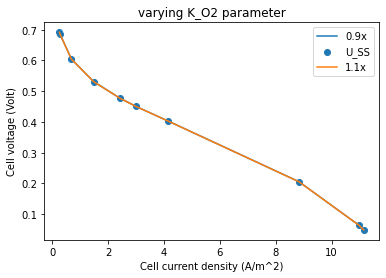

In [15]:
# K_O2 parameter

Ac=[] ; CO2=[] ; H=[] ; x=[] ; O2=[] ; OH=[] ; M=[] ; na=[] ; nc=[] ; U=[]
r1=[] ; r2=[]
for i in range(0,len(i_cell_val)):
    t=np.linspace(0,150,1000)
    i_cell_1=i_cell_val[i]
    ini=(1.56,0,0,0.1,0.3125,0,0,0,0)
    mod=odeint(model,ini,t,args=(i_cell_1,
                                 F,R,T,k_m,d_m,k_aq,d_cell,Ca,Cc,Va,Vc,Am,Yac,K_dec,fx,Qa,Qc,C_Ac_in,C_CO2_in,X_in,C_H_in,C_O2_in,C_M_in,C_OH_in,Uo,ko_1,ko_2,K_Ac,0.9*K_O2,al,be))
    calculation()

#Uplot(U1)
#Pd_1=[i*j for i,j in zip(i_cell_val,U)]   
#Pdplot()
plt.plot(i_cell_val,U,label='0.9x')
plt.scatter(i_cell_val,U1,label='U_SS')
plt.legend()


Ac=[] ; CO2=[] ; H=[] ; x=[] ; O2=[] ; OH=[] ; M=[] ; na=[] ; nc=[] ; U=[]
r1=[] ; r2=[]
for i in range(0,len(i_cell_val)):
    t=np.linspace(0,150,1000)
    i_cell_1=i_cell_val[i]
    ini=(1.56,0,0,0.1,0.3125,0,0,0,0)
    mod=odeint(model,ini,t,args=(i_cell_1,
                                 F,R,T,k_m,d_m,k_aq,d_cell,Ca,Cc,Va,Vc,Am,Yac,K_dec,fx,Qa,Qc,C_Ac_in,C_CO2_in,X_in,C_H_in,C_O2_in,C_M_in,C_OH_in,Uo,ko_1,ko_2,K_Ac,1.1*K_O2,al,be))
    calculation()

#Uplot(U1)
#Pd_2=[i*j for i,j in zip(i_cell_val,U)]   
#Pdplot()

plt.title('varying K_O2 parameter')
plt.plot(i_cell_val,U,label='1.1x')
plt.legend()

plt.xlabel('Cell current density (A/m^2)')
plt.ylabel('Cell voltage (Volt)')

#plt.plot(i_cell_val,Pd1,label='Base')
#plt.plot(i_cell_val,Pd_1,label='0.9K_O2')
#plt.plot(i_cell_val,Pd_2,label='1.1K_O2')
#plt.legend()

Text(0, 0.5, 'Cell voltage (Volt)')

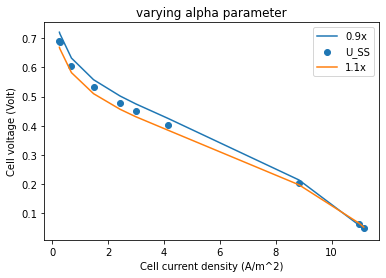

In [16]:
# al parameter

Ac=[] ; CO2=[] ; H=[] ; x=[] ; O2=[] ; OH=[] ; M=[] ; na=[] ; nc=[] ; U=[]
r1=[] ; r2=[]
for i in range(0,len(i_cell_val)):
    t=np.linspace(0,150,1000)
    i_cell_1=i_cell_val[i]
    ini=(1.56,0,0,0.1,0.3125,0,0,0,0)
    mod=odeint(model,ini,t,args=(i_cell_1,
                                 F,R,T,k_m,d_m,k_aq,d_cell,Ca,Cc,Va,Vc,Am,Yac,K_dec,fx,Qa,Qc,C_Ac_in,C_CO2_in,X_in,C_H_in,C_O2_in,C_M_in,C_OH_in,Uo,ko_1,ko_2,K_Ac,K_O2,0.9*al,be))
    calculation()

#Uplot(U1)
#Pd_1=[i*j for i,j in zip(i_cell_val,U)]   
#Pdplot()
plt.plot(i_cell_val,U,label='0.9x')
plt.scatter(i_cell_val,U1,label='U_SS')
plt.legend()


Ac=[] ; CO2=[] ; H=[] ; x=[] ; O2=[] ; OH=[] ; M=[] ; na=[] ; nc=[] ; U=[]
r1=[] ; r2=[]
for i in range(0,len(i_cell_val)):
    t=np.linspace(0,150,1000)
    i_cell_1=i_cell_val[i]
    ini=(1.56,0,0,0.1,0.3125,0,0,0,0)
    mod=odeint(model,ini,t,args=(i_cell_1,
                                 F,R,T,k_m,d_m,k_aq,d_cell,Ca,Cc,Va,Vc,Am,Yac,K_dec,fx,Qa,Qc,C_Ac_in,C_CO2_in,X_in,C_H_in,C_O2_in,C_M_in,C_OH_in,Uo,ko_1,ko_2,K_Ac,K_O2,1.1*al,be))
    calculation()

#Uplot(U1)
#Pd_2=[i*j for i,j in zip(i_cell_val,U)]   
#Pdplot()
plt.title('varying alpha parameter')
plt.plot(i_cell_val,U,label='1.1x')
plt.legend()

plt.xlabel('Cell current density (A/m^2)')
plt.ylabel('Cell voltage (Volt)')

#plt.plot(i_cell_val,Pd1,label='Base')
#plt.plot(i_cell_val,Pd_1,label='0.9al')
#plt.plot(i_cell_val,Pd_2,label='1.1al')
#plt.legend()

Text(0, 0.5, 'Cell voltage (Volt)')

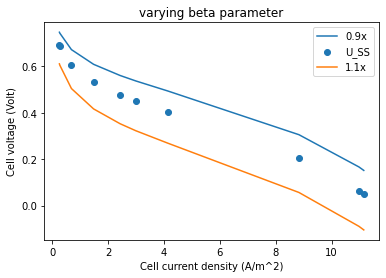

In [17]:
# be parameter

Ac=[] ; CO2=[] ; H=[] ; x=[] ; O2=[] ; OH=[] ; M=[] ; na=[] ; nc=[] ; U=[]
r1=[] ; r2=[]
for i in range(0,len(i_cell_val)):
    t=np.linspace(0,150,1000)
    i_cell_1=i_cell_val[i]
    ini=(1.56,0,0,0.1,0.3125,0,0,0,0)
    mod=odeint(model,ini,t,args=(i_cell_1,
                                 F,R,T,k_m,d_m,k_aq,d_cell,Ca,Cc,Va,Vc,Am,Yac,K_dec,fx,Qa,Qc,C_Ac_in,C_CO2_in,X_in,C_H_in,C_O2_in,C_M_in,C_OH_in,Uo,ko_1,ko_2,K_Ac,K_O2,al,0.9*be))
    calculation()

#Uplot(U1)
Pd_1=[i*j for i,j in zip(i_cell_val,U)]   
#Pdplot()
plt.plot(i_cell_val,U,label='0.9x')
plt.scatter(i_cell_val,U1,label='U_SS')
plt.legend()


Ac=[] ; CO2=[] ; H=[] ; x=[] ; O2=[] ; OH=[] ; M=[] ; na=[] ; nc=[] ; U=[]
r1=[] ; r2=[]
for i in range(0,len(i_cell_val)):
    t=np.linspace(0,150,1000)
    i_cell_1=i_cell_val[i]
    ini=(1.56,0,0,0.1,0.3125,0,0,0,0)
    mod=odeint(model,ini,t,args=(i_cell_1,
                                 F,R,T,k_m,d_m,k_aq,d_cell,Ca,Cc,Va,Vc,Am,Yac,K_dec,fx,Qa,Qc,C_Ac_in,C_CO2_in,X_in,C_H_in,C_O2_in,C_M_in,C_OH_in,Uo,ko_1,ko_2,K_Ac,K_O2,al,1.1*be))
    calculation()

#Uplot(U1)
Pd_2=[i*j for i,j in zip(i_cell_val,U)]   
#Pdplot()
plt.title('varying beta parameter')
plt.plot(i_cell_val,U,label='1.1x')
plt.legend()

plt.xlabel('Cell current density (A/m^2)')
plt.ylabel('Cell voltage (Volt)')

#plt.plot(i_cell_val,Pd1,label='Base')
#plt.plot(i_cell_val,Pd_1,label='0.9be')
#plt.plot(i_cell_val,Pd_2,label='1.1be')
#plt.legend()

Text(0, 0.5, 'Cell voltage (Volt)')

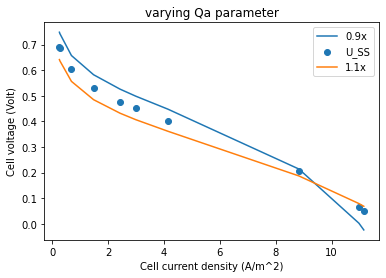

In [18]:
# Qa parameter

Ac=[] ; CO2=[] ; H=[] ; x=[] ; O2=[] ; OH=[] ; M=[] ; na=[] ; nc=[] ; U=[]
r1=[] ; r2=[]
for i in range(0,len(i_cell_val)):
    t=np.linspace(0,150,1000)
    i_cell_1=i_cell_val[i]
    ini=(1.56,0,0,0.1,0.3125,0,0,0,0)
    mod=odeint(model,ini,t,args=(i_cell_1,
                                 F,R,T,k_m,d_m,k_aq,d_cell,Ca,Cc,Va,Vc,Am,Yac,K_dec,fx,0.9*Qa,Qc,C_Ac_in,C_CO2_in,X_in,C_H_in,C_O2_in,C_M_in,C_OH_in,Uo,ko_1,ko_2,K_Ac,K_O2,al,be))
    calculation()

plt.plot(i_cell_val,U,label='0.9x')
plt.scatter(i_cell_val,U1,label='U_SS')
plt.legend()

Ac=[] ; CO2=[] ; H=[] ; x=[] ; O2=[] ; OH=[] ; M=[] ; na=[] ; nc=[] ; U=[]
r1=[] ; r2=[]
for i in range(0,len(i_cell_val)):
    t=np.linspace(0,150,1000)
    i_cell_1=i_cell_val[i]
    ini=(1.56,0,0,0.1,0.3125,0,0,0,0)
    mod=odeint(model,ini,t,args=(i_cell_1,
                                 F,R,T,k_m,d_m,k_aq,d_cell,Ca,Cc,Va,Vc,Am,Yac,K_dec,fx,1.1*Qa,Qc,C_Ac_in,C_CO2_in,X_in,C_H_in,C_O2_in,C_M_in,C_OH_in,Uo,ko_1,ko_2,K_Ac,K_O2,al,be))
    calculation()

plt.title('varying Qa parameter')
plt.plot(i_cell_val,U,label='1.1x')
plt.legend()

plt.xlabel('Cell current density (A/m^2)')
plt.ylabel('Cell voltage (Volt)')

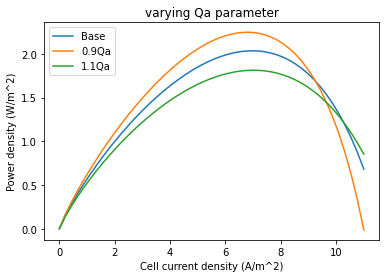

In [19]:
# Qa parameter
i_cell=np.linspace(0,11)

Ac=[] ; CO2=[] ; H=[] ; x=[] ; O2=[] ; OH=[] ; M=[] ; na=[] ; nc=[] ; U=[]
r1=[] ; r2=[]
for i in range(0,len(i_cell)):
    t=np.linspace(0,150,1000)
    i_cell_1=i_cell[i]
    ini=(1.56,0,0,0.1,0.3125,0,0,0,0)
    mod=odeint(model,ini,t,args=(i_cell_1,
                                 F,R,T,k_m,d_m,k_aq,d_cell,Ca,Cc,Va,Vc,Am,Yac,K_dec,fx,Qa,Qc,C_Ac_in,C_CO2_in,X_in,C_H_in,C_O2_in,C_M_in,C_OH_in,Uo,ko_1,ko_2,K_Ac,K_O2,al,be))
    calculation()
Pd_0=[i*j for i,j in zip(i_cell,U)]   

Ac=[] ; CO2=[] ; H=[] ; x=[] ; O2=[] ; OH=[] ; M=[] ; na=[] ; nc=[] ; U=[]
r1=[] ; r2=[]
for i in range(0,len(i_cell)):
    t=np.linspace(0,150,1000)
    i_cell_1=i_cell[i]
    ini=(1.56,0,0,0.1,0.3125,0,0,0,0)
    mod=odeint(model,ini,t,args=(i_cell_1,
                                 F,R,T,k_m,d_m,k_aq,d_cell,Ca,Cc,Va,Vc,Am,Yac,K_dec,fx,0.9*Qa,Qc,C_Ac_in,C_CO2_in,X_in,C_H_in,C_O2_in,C_M_in,C_OH_in,Uo,ko_1,ko_2,K_Ac,K_O2,al,be))
    calculation()
Pd_1=[i*j for i,j in zip(i_cell,U)]   

Ac=[] ; CO2=[] ; H=[] ; x=[] ; O2=[] ; OH=[] ; M=[] ; na=[] ; nc=[] ; U=[]
r1=[] ; r2=[]
for i in range(0,len(i_cell)):
    t=np.linspace(0,150,1000)
    i_cell_1=i_cell[i]
    ini=(1.56,0,0,0.1,0.3125,0,0,0,0)
    mod=odeint(model,ini,t,args=(i_cell_1,
                                 F,R,T,k_m,d_m,k_aq,d_cell,Ca,Cc,Va,Vc,Am,Yac,K_dec,fx,1.1*Qa,Qc,C_Ac_in,C_CO2_in,X_in,C_H_in,C_O2_in,C_M_in,C_OH_in,Uo,ko_1,ko_2,K_Ac,K_O2,al,be))
    calculation()
Pd_2=[i*j for i,j in zip(i_cell,U)]   

plt.title('varying Qa parameter')
plt.xlabel('Cell current density (A/m^2)')
plt.ylabel('Power density (W/m^2)')
plt.plot(i_cell,Pd_0,label='Base')
plt.plot(i_cell,Pd_1,label='0.9Qa')
plt.plot(i_cell,Pd_2,label='1.1Qa')
plt.legend()

Text(0, 0.5, 'Cell voltage (Volt)')

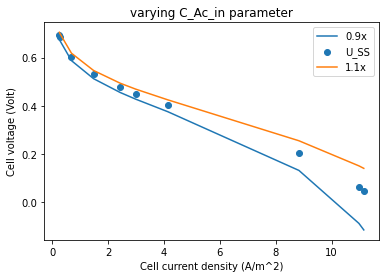

In [20]:
# C_Ac_in parameter

Ac=[] ; CO2=[] ; H=[] ; x=[] ; O2=[] ; OH=[] ; M=[] ; na=[] ; nc=[] ; U=[]
r1=[] ; r2=[]
for i in range(0,len(i_cell_val)):
    t=np.linspace(0,150,1000)
    i_cell_1=i_cell_val[i]
    ini=(1.56,0,0,0.1,0.3125,0,0,0,0)
    mod=odeint(model,ini,t,args=(i_cell_1,
                                 F,R,T,k_m,d_m,k_aq,d_cell,Ca,Cc,Va,Vc,Am,Yac,K_dec,fx,Qa,Qc,0.9*C_Ac_in,C_CO2_in,X_in,C_H_in,C_O2_in,C_M_in,C_OH_in,Uo,ko_1,ko_2,K_Ac,K_O2,al,be))
    calculation()

plt.plot(i_cell_val,U,label='0.9x')
plt.scatter(i_cell_val,U1,label='U_SS')
plt.legend()


Ac=[] ; CO2=[] ; H=[] ; x=[] ; O2=[] ; OH=[] ; M=[] ; na=[] ; nc=[] ; U=[]
r1=[] ; r2=[]
for i in range(0,len(i_cell_val)):
    t=np.linspace(0,150,1000)
    i_cell_1=i_cell_val[i]
    ini=(1.56,0,0,0.1,0.3125,0,0,0,0)
    mod=odeint(model,ini,t,args=(i_cell_1,
                                 F,R,T,k_m,d_m,k_aq,d_cell,Ca,Cc,Va,Vc,Am,Yac,K_dec,fx,Qa,Qc,1.1*C_Ac_in,C_CO2_in,X_in,C_H_in,C_O2_in,C_M_in,C_OH_in,Uo,ko_1,ko_2,K_Ac,K_O2,al,be))
    calculation()
plt.title('varying C_Ac_in parameter')
plt.plot(i_cell_val,U,label='1.1x')
plt.legend()
plt.xlabel('Cell current density (A/m^2)')
plt.ylabel('Cell voltage (Volt)')

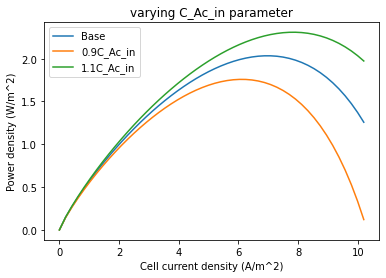

In [21]:
# C_Ac_in parameter
i_cell=np.linspace(0,10.2)
Ac=[] ; CO2=[] ; H=[] ; x=[] ; O2=[] ; OH=[] ; M=[] ; na=[] ; nc=[] ; U=[]
r1=[] ; r2=[]

for i in range(0,len(i_cell)):
    t=np.linspace(0,150,1000)
    i_cell_1=i_cell[i]
    ini=(1.56,0,0,0.1,0.3125,0,0,0,0)
    mod=odeint(model,ini,t,args=(i_cell_1,
                                 F,R,T,k_m,d_m,k_aq,d_cell,Ca,Cc,Va,Vc,Am,Yac,K_dec,fx,Qa,Qc,C_Ac_in,C_CO2_in,X_in,C_H_in,C_O2_in,C_M_in,C_OH_in,Uo,ko_1,ko_2,K_Ac,K_O2,al,be))
    calculation()
    
Pd_0=[i*j for i,j in zip(i_cell,U)]   

Ac=[] ; CO2=[] ; H=[] ; x=[] ; O2=[] ; OH=[] ; M=[] ; na=[] ; nc=[] ; U=[]
r1=[] ; r2=[]
for i in range(0,len(i_cell)):
    t=np.linspace(0,150,1000)
    i_cell_1=i_cell[i]
    ini=(1.56,0,0,0.1,0.3125,0,0,0,0)
    mod=odeint(model,ini,t,args=(i_cell_1,
                                 F,R,T,k_m,d_m,k_aq,d_cell,Ca,Cc,Va,Vc,Am,Yac,K_dec,fx,Qa,Qc,0.9*C_Ac_in,C_CO2_in,X_in,C_H_in,C_O2_in,C_M_in,C_OH_in,Uo,ko_1,ko_2,K_Ac,K_O2,al,be))
    calculation()
Pd_1=[i*j for i,j in zip(i_cell,U)]   

Ac=[] ; CO2=[] ; H=[] ; x=[] ; O2=[] ; OH=[] ; M=[] ; na=[] ; nc=[] ; U=[]
r1=[] ; r2=[]
for i in range(0,len(i_cell)):
    t=np.linspace(0,150,1000)
    i_cell_1=i_cell[i]
    ini=(1.56,0,0,0.1,0.3125,0,0,0,0)
    mod=odeint(model,ini,t,args=(i_cell_1,
                                 F,R,T,k_m,d_m,k_aq,d_cell,Ca,Cc,Va,Vc,Am,Yac,K_dec,fx,Qa,Qc,1.1*C_Ac_in,C_CO2_in,X_in,C_H_in,C_O2_in,C_M_in,C_OH_in,Uo,ko_1,ko_2,K_Ac,K_O2,al,be))
    calculation()

Pd_2=[i*j for i,j in zip(i_cell,U)] 

plt.title('varying C_Ac_in parameter')
plt.xlabel('Cell current density (A/m^2)')
plt.ylabel('Power density (W/m^2)')
plt.plot(i_cell,Pd_0,label='Base')
plt.plot(i_cell,Pd_1,label='0.9C_Ac_in')
plt.plot(i_cell,Pd_2,label='1.1C_Ac_in')
plt.legend()

# Parameter estimation

array([1.92002072e-01, 9.55685093e-05, 5.98079728e-01, 5.58659142e-03,
       5.63754717e-02, 6.72958637e-01])

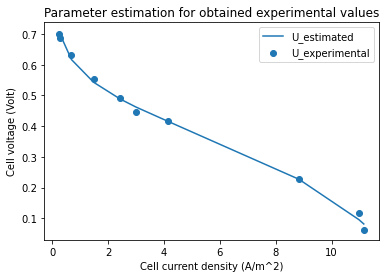

In [22]:
def residuals(p,U_exp):
    ko_1=p[0]
    ko_2=p[1]
    K_Ac=p[2]
    K_O2=p[3]
    al=p[4]
    be=p[5]
    F=96485.4 ; R=8.3144 ; T=303
    k_m=17 ; d_m=1.778e-4
    k_aq=5 ; d_cell=2.2e-2
    Ca=4e2 ; Cc=5e2
    Va=5.5e-5 ; Vc=5.5e-5
    Am=5e-4 ; Yac=0.05 ; K_dec=8.33e-4
    fx=10
    Qa=2.25e-5 ; Qc=1.11e-3
    C_Ac_in=1.56 ; C_CO2_in=0 ; X_in=0 ; C_H_in=0 ; C_O2_in=0.3125 ; C_M_in=0 ; C_OH_in=0
    Uo=0.77

    Ac=[] ; CO2=[] ; H=[] ; x=[] ; O2=[] ; OH=[] ; M=[] ; na=[] ; nc=[] ; U=[]
    r1=[] ; r2=[]
    for i in range(0,len(i_cell_val)):
        t=np.linspace(0,150,1000)
        i_cell_1=i_cell_val[i]
        ini=(1.56,0,0,0.1,0.3125,0,0,0,0)
        mod=odeint(model,ini,t,args=(i_cell_1,
                                     F,R,T,k_m,d_m,k_aq,d_cell,Ca,Cc,Va,Vc,Am,Yac,K_dec,fx,Qa,Qc,C_Ac_in,C_CO2_in,X_in,C_H_in,C_O2_in,C_M_in,C_OH_in,Uo,ko_1,ko_2,K_Ac,K_O2,al,be))
        n_a=mod[:,7]
        n_c=mod[:,8]
        U.append(Uo-n_a[-1]+n_c[-1]-(((d_m/k_m)+d_cell/k_aq)*i_cell_1))
        
    U_cal=np.asarray(U)
    U_expt=np.asarray(U_exp)
    #plt.plot(i_cell_val,U_cal)
    #plt.scatter(i_cell_val,U_expt)
    
    return (U_cal-U_expt).flatten()
    
# For experimental Ucell value
    
p0=[0.207,3.288e-05,0.592,0.004,0.051,0.663]
out=least_squares(residuals,p0,args=(U_exp,))
U=U_exp+out.fun
Pd=[i*j for i,j in zip(i_cell_val,U)]   
plt.title('Parameter estimation for obtained experimental values')
plt.plot(i_cell_val,U,label='U_estimated')
plt.scatter(i_cell_val,U_exp,label='U_experimental')
plt.legend()

plt.xlabel('Cell current density (A/m^2)')
plt.ylabel('Cell voltage (Volt)')
out.x

array([2.070e-01, 3.288e-05, 5.920e-01, 4.000e-03, 5.100e-02, 6.630e-01])

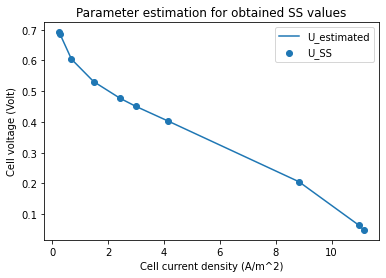

In [23]:
# For SS Ucell value

out1=least_squares(residuals,p0,args=(U1,))
U=U1+out1.fun
Pd=[i*j for i,j in zip(i_cell_val,U)]   
#Pdplot()
#Uplot(U1)
plt.title('Parameter estimation for obtained SS values')
plt.plot(i_cell_val,U,label='U_estimated')
plt.scatter(i_cell_val,U1,label='U_SS')
plt.legend()

plt.xlabel('Cell current density (A/m^2)')
plt.ylabel('Cell voltage (Volt)')
out1.x

# Dynamic Simulation

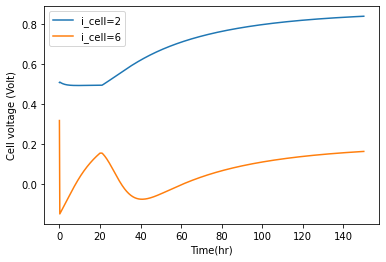

In [24]:
# Step decrease of Qa

i_cell=2
t=np.linspace(0,20,21*5)
ini=(1.56,0,0,0.1,0.3125,0,0,-0.24,-0.492)
mod=odeint(model,ini,t,args=(i_cell,
                                 F,R,T,k_m,d_m,k_aq,d_cell,Ca,Cc,Va,Vc,Am,Yac,K_dec,fx,Qa,Qc,C_Ac_in,C_CO2_in,X_in,C_H_in,C_O2_in,C_M_in,C_OH_in,Uo,ko_1,ko_2,K_Ac,K_O2,al,be))
C_Ac=mod[:,0]
C_CO2=mod[:,1]
C_H=mod[:,2]
X=mod[:,3]
C_O2=mod[:,4]
C_OH=mod[:,5]
C_M=mod[:,6]
n_a=mod[:,7]
n_c=mod[:,8]
U=Uo-n_a+n_c-(((d_m/k_m)+d_cell/k_aq)*i_cell)
Pd_1=i_cell*U  

t1=np.linspace(21,150,130*5)
ini=(C_Ac[-1],C_CO2[-1],C_H[-1],X[-1],C_O2[-1],C_OH[-1],C_M[-1],n_a[-1],n_c[-1])
mod1=odeint(model,ini,t1,args=(i_cell,
                                 F,R,T,k_m,d_m,k_aq,d_cell,Ca,Cc,Va,Vc,Am,Yac,K_dec,fx,1e-05,Qc,C_Ac_in,C_CO2_in,X_in,C_H_in,C_O2_in,C_M_in,C_OH_in,Uo,ko_1,ko_2,K_Ac,K_O2,al,be))
C_Ac2=mod1[:,0]
C_CO2=mod1[:,1]
C_H=mod1[:,2]
X=mod1[:,3]
C_O2=mod1[:,4]
C_OH=mod1[:,5]
C_M=mod1[:,6]
n_a1=mod1[:,7]
n_c1=mod1[:,8]
U2=Uo-n_a1+n_c1-(((d_m/k_m)+d_cell/k_aq)*i_cell)
Pd_2=i_cell*U2

t_fin=[]
U_fin=[]
Pd1_fin=[]
C_Ac1_fin=[]
n_a1_fin=[]
n_c1_fin=[]

for i in range(0,len(t)):
    t_fin.append(t[i])
    U_fin.append(U[i])
    Pd1_fin.append(Pd_1[i])
    C_Ac1_fin.append(C_Ac[i])
    n_a1_fin.append(n_a[i])
    n_c1_fin.append(n_c[i])
    
for i in range(0,len(t1)):
    t_fin.append(t1[i])
    U_fin.append(U2[i])
    Pd1_fin.append(Pd_2[i])
    C_Ac1_fin.append(C_Ac2[i])
    n_a1_fin.append(n_a1[i])
    n_c1_fin.append(n_c1[i])
    

plt.plot(t_fin,U_fin,label='i_cell=2')

i_cell=6
t=np.linspace(0,20,21*5)

ini=(1.56,0,0,0.1,0.3125,0,0,-0.15,-0.575)
mod=odeint(model,ini,t,args=(i_cell,
                                 F,R,T,k_m,d_m,k_aq,d_cell,Ca,Cc,Va,Vc,Am,Yac,K_dec,fx,2.25e-05,Qc,C_Ac_in,C_CO2_in,X_in,C_H_in,C_O2_in,C_M_in,C_OH_in,Uo,ko_1,ko_2,K_Ac,K_O2,al,be))

C_Ac=mod[:,0]
C_CO2=mod[:,1]
C_H=mod[:,2]
X=mod[:,3]
C_O2=mod[:,4]
C_OH=mod[:,5]
C_M=mod[:,6]
n_a=mod[:,7]
n_c=mod[:,8]
U=Uo-n_a+n_c-(((d_m/k_m)+d_cell/k_aq)*i_cell)
Pd_1=i_cell*U

t1=np.linspace(21,150,130*5)

ini=(C_Ac[-1],C_CO2[-1],C_H[-1],X[-1],C_O2[-1],C_OH[-1],C_M[-1],n_a[-1],n_c[-1])
mod1=odeint(model,ini,t1,args=(i_cell,
                                 F,R,T,k_m,d_m,k_aq,d_cell,Ca,Cc,Va,Vc,Am,Yac,K_dec,fx,1e-05,Qc,C_Ac_in,C_CO2_in,X_in,C_H_in,C_O2_in,C_M_in,C_OH_in,Uo,ko_1,ko_2,K_Ac,K_O2,al,be))

C_Ac2=mod1[:,0]
C_CO2=mod1[:,1]
C_H=mod1[:,2]
X=mod1[:,3]
C_O2=mod1[:,4]
C_OH=mod1[:,5]
C_M=mod1[:,6]
n_a1=mod1[:,7]
n_c1=mod1[:,8]
U2=Uo-n_a1+n_c1-(((d_m/k_m)+d_cell/k_aq)*i_cell)
Pd_2=i_cell*U2

t_fin=[]
U_fin=[]
Pd2_fin=[]
C_Ac2_fin=[]
n_a2_fin=[]
n_c2_fin=[]
for i in range(0,len(t)):
    t_fin.append(t[i])
    U_fin.append(U[i])
    Pd2_fin.append(Pd_1[i])
    C_Ac2_fin.append(C_Ac[i])
    n_a2_fin.append(n_a[i])
    n_c2_fin.append(n_c[i])   
    
    
for i in range(0,len(t1)):
    t_fin.append(t1[i])
    U_fin.append(U2[i])
    Pd2_fin.append(Pd_2[i])
    C_Ac2_fin.append(C_Ac2[i])
    n_a2_fin.append(n_a1[i])
    n_c2_fin.append(n_c1[i])

plt.plot(t_fin,U_fin,label='i_cell=6')
plt.xlabel('Time(hr)')
plt.ylabel('Cell voltage (Volt)')
plt.legend()

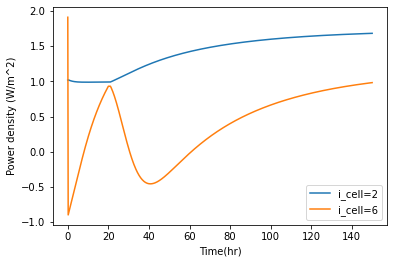

In [25]:
plt.plot(t_fin,Pd1_fin,label='i_cell=2')
plt.plot(t_fin,Pd2_fin,label='i_cell=6')
plt.xlabel('Time(hr)')
plt.ylabel('Power density (W/m^2)')
plt.legend()

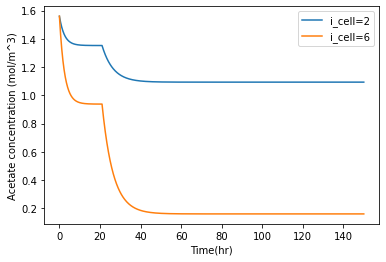

In [26]:
plt.plot(t_fin,C_Ac1_fin,label='i_cell=2')
plt.plot(t_fin,C_Ac2_fin,label='i_cell=6')
plt.xlabel('Time(hr)')
plt.ylabel('Acetate concentration (mol/m^3)')
plt.legend()


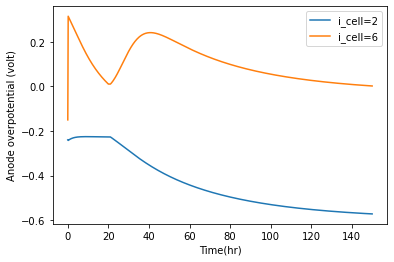

In [27]:
plt.plot(t_fin,n_a1_fin,label='i_cell=2')
plt.plot(t_fin,n_a2_fin,label='i_cell=6')
plt.xlabel('Time(hr)')
plt.ylabel('Anode overpotential (volt)')
plt.legend()

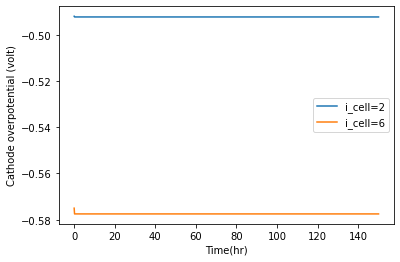

In [28]:
plt.plot(t_fin,n_c1_fin,label='i_cell=2')
plt.plot(t_fin,n_c2_fin,label='i_cell=6')
plt.xlabel('Time(hr)')
plt.ylabel('Cathode overpotential (volt)')
plt.legend()

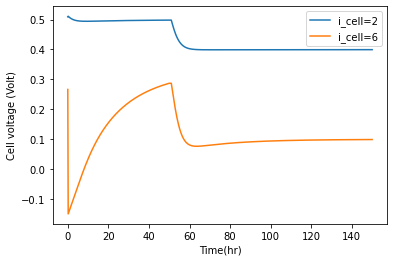

In [29]:
# Step decrease of C_Ac_in from 1.56 to 1

i_cell=2
t=np.linspace(0,50,51*5)
ini=(1.56,0,0,0.1,0.3125,0,0,-0.24,-0.492)
mod=odeint(model,ini,t,args=(i_cell,
                                 F,R,T,k_m,d_m,k_aq,d_cell,Ca,Cc,Va,Vc,Am,Yac,K_dec,fx,Qa,Qc,C_Ac_in,C_CO2_in,X_in,C_H_in,C_O2_in,C_M_in,C_OH_in,Uo,ko_1,ko_2,K_Ac,K_O2,al,be))
C_Ac=mod[:,0]
C_CO2=mod[:,1]
C_H=mod[:,2]
X=mod[:,3]
C_O2=mod[:,4]
C_OH=mod[:,5]
C_M=mod[:,6]
n_a=mod[:,7]
n_c=mod[:,8]
U=Uo-n_a+n_c-(((d_m/k_m)+d_cell/k_aq)*i_cell)
Pd_1=i_cell*U  

t1=np.linspace(51,150,100*5)
ini=(C_Ac[-1],C_CO2[-1],C_H[-1],X[-1],C_O2[-1],C_OH[-1],C_M[-1],n_a[-1],n_c[-1])
mod1=odeint(model,ini,t1,args=(i_cell,
                                 F,R,T,k_m,d_m,k_aq,d_cell,Ca,Cc,Va,Vc,Am,Yac,K_dec,fx,Qa,Qc,1,C_CO2_in,X_in,C_H_in,C_O2_in,C_M_in,C_OH_in,Uo,ko_1,ko_2,K_Ac,K_O2,al,be))
C_Ac2=mod1[:,0]
C_CO2=mod1[:,1]
C_H=mod1[:,2]
X=mod1[:,3]
C_O2=mod1[:,4]
C_OH=mod1[:,5]
C_M=mod1[:,6]
n_a1=mod1[:,7]
n_c1=mod1[:,8]
U2=Uo-n_a1+n_c1-(((d_m/k_m)+d_cell/k_aq)*i_cell)
Pd_2=i_cell*U2

t_fin=[]
U_fin=[]
Pd1_fin=[]
C_Ac1_fin=[]
n_a1_fin=[]
n_c1_fin=[]

for i in range(0,len(t)):
    t_fin.append(t[i])
    U_fin.append(U[i])
    Pd1_fin.append(Pd_1[i])
    C_Ac1_fin.append(C_Ac[i])
    n_a1_fin.append(n_a[i])
    n_c1_fin.append(n_c[i])
    
for i in range(0,len(t1)):
    t_fin.append(t1[i])
    U_fin.append(U2[i])
    Pd1_fin.append(Pd_2[i])
    C_Ac1_fin.append(C_Ac2[i])
    n_a1_fin.append(n_a1[i])
    n_c1_fin.append(n_c1[i])

plt.plot(t_fin,U_fin,label='i_cell=2')


i_cell=6
t=np.linspace(0,50,51*5)
ini=(1.56,0,0,0.1,0.3125,0,0,-0.1,-0.577)
mod=odeint(model,ini,t,args=(i_cell,
                                 F,R,T,k_m,d_m,k_aq,d_cell,Ca,Cc,Va,Vc,Am,Yac,K_dec,fx,Qa,Qc,C_Ac_in,C_CO2_in,X_in,C_H_in,C_O2_in,C_M_in,C_OH_in,Uo,ko_1,ko_2,K_Ac,K_O2,al,be))
C_Ac=mod[:,0]
C_CO2=mod[:,1]
C_H=mod[:,2]
X=mod[:,3]
C_O2=mod[:,4]
C_OH=mod[:,5]
C_M=mod[:,6]
n_a=mod[:,7]
n_c=mod[:,8]
U=Uo-n_a+n_c-(((d_m/k_m)+d_cell/k_aq)*i_cell)
Pd_1=i_cell*U  

t1=np.linspace(51,150,100*5)
ini=(C_Ac[-1],C_CO2[-1],C_H[-1],X[-1],C_O2[-1],C_OH[-1],C_M[-1],n_a[-1],n_c[-1])
mod1=odeint(model,ini,t1,args=(i_cell,
                                 F,R,T,k_m,d_m,k_aq,d_cell,Ca,Cc,Va,Vc,Am,Yac,K_dec,fx,Qa,Qc,1,C_CO2_in,X_in,C_H_in,C_O2_in,C_M_in,C_OH_in,Uo,ko_1,ko_2,K_Ac,K_O2,al,be))
C_Ac2=mod1[:,0]
C_CO2=mod1[:,1]
C_H=mod1[:,2]
X=mod1[:,3]
C_O2=mod1[:,4]
C_OH=mod1[:,5]
C_M=mod1[:,6]
n_a1=mod1[:,7]
n_c1=mod1[:,8]
U2=Uo-n_a1+n_c1-(((d_m/k_m)+d_cell/k_aq)*i_cell)

Pd_2=i_cell*U2

t_fin=[]
U_fin=[]
Pd2_fin=[]
C_Ac2_fin=[]
n_a2_fin=[]
n_c2_fin=[]
for i in range(0,len(t)):
    t_fin.append(t[i])
    U_fin.append(U[i])
    Pd2_fin.append(Pd_1[i])
    C_Ac2_fin.append(C_Ac[i])
    n_a2_fin.append(n_a[i])
    n_c2_fin.append(n_c[i])   
    
    
for i in range(0,len(t1)):
    t_fin.append(t1[i])
    U_fin.append(U2[i])
    Pd2_fin.append(Pd_2[i])
    C_Ac2_fin.append(C_Ac2[i])
    n_a2_fin.append(n_a1[i])
    n_c2_fin.append(n_c1[i])
    

plt.plot(t_fin,U_fin,label='i_cell=6')
plt.xlabel('Time(hr)')
plt.ylabel('Cell voltage (Volt)')
plt.legend()

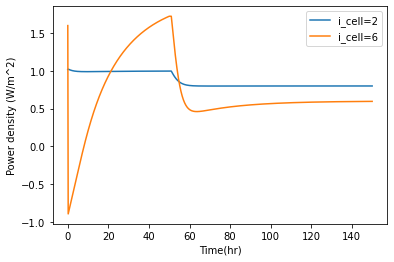

In [30]:
plt.plot(t_fin,Pd1_fin,label='i_cell=2')
plt.plot(t_fin,Pd2_fin,label='i_cell=6')
plt.xlabel('Time(hr)')
plt.ylabel('Power density (W/m^2)')
plt.legend()

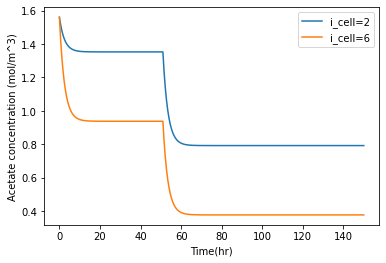

In [31]:
plt.plot(t_fin,C_Ac1_fin,label='i_cell=2')
plt.plot(t_fin,C_Ac2_fin,label='i_cell=6')
plt.xlabel('Time(hr)')
plt.ylabel('Acetate concentration (mol/m^3)')
plt.legend()

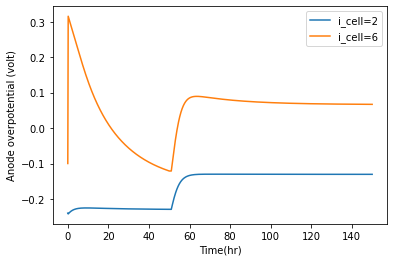

In [32]:
plt.plot(t_fin,n_a1_fin,label='i_cell=2')
plt.plot(t_fin,n_a2_fin,label='i_cell=6')
plt.xlabel('Time(hr)')
plt.ylabel('Anode overpotential (volt)')
plt.legend()

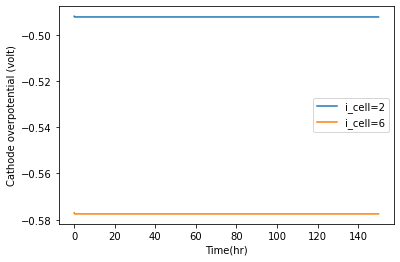

In [33]:
plt.plot(t_fin,n_c1_fin,label='i_cell=2')
plt.plot(t_fin,n_c2_fin,label='i_cell=6')
plt.xlabel('Time(hr)')
plt.ylabel('Cathode overpotential (volt)')
plt.legend()